In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from math import log

In [4]:
import os
data_path = os.path.dirname(os.getcwd())

In [8]:
df = pd.read_csv(data_path + '/raw_data/SH000300.csv', names=['date', 'time', 'open', 'high', 'low', 'close', 'volume', 'amount'])
df.index = pd.to_datetime(df['date'] + ' ' + df['time'])
df.drop(columns=['date', 'time'], inplace=True)
df.drop(df[df['volume']==0].index, inplace=True)
df

,open,high,low,close,volume,amount
2018-01-02 09:35:00,4045.2086,4059.5993,4047.8763,4059.5993,6691559,8479815494
2018-01-02 09:40:00,4059.9316,4064.4471,4059.9316,4061.4502,5868679,7243598887
2018-01-02 09:45:00,4061.2359,4062.0694,4055.2121,4055.3919,5313430,6607843056
2018-01-02 09:50:00,4055.1682,4066.8132,4055.1682,4066.8132,5636074,6364879921
2018-01-02 09:55:00,4066.5126,4071.6713,4066.4359,4070.0890,5965043,6838486702
...,...,...,...,...,...,...
2023-05-12 14:40:00,3944.5700,3944.9700,3941.6800,3941.7400,2838726,4362715136
2023-05-12 14:45:00,3941.6000,3941.6400,3939.2900,3939.6200,3840507,5333417984
2023-05-12 14:50:00,3940.2000,3941.8200,3939.9200,3940.8000,3473375,5176201216
2023-05-12 14:55:00,3940.4600,3940.8300,3938.9900,3939.0700,4319086,6106451968


In [11]:
# 增加特征
df_feature = df.copy()
df_feature['pre_close'] = df_feature['close'].shift()
df_feature['avg_price'] = df_feature['amount'] / df_feature['volume']
df_feature['twap_5'] = df_feature['close'].rolling(5).mean()
df_feature['vwap_5'] = (df_feature['close']*df_feature['volume']).rolling(5).sum() / (df_feature['volume'].rolling(5).sum())
df_feature['open_close'] = df_feature['open'] / df_feature['close'] - 1
df_feature['high_close'] = df_feature['high'] / df_feature['close'] - 1
df_feature['low_close'] = df_feature['low'] / df_feature['close'] - 1
df_feature['log_ret'] = (df_feature['close'] / df_feature['close'].shift()).apply(lambda x:log(x))
df_feature['ret'] = df_feature['close'] / df_feature['close'].shift() - 1
df_feature['ret_5'] = df_feature['ret'].rolling(5).mean()
df_feature['ret_10'] = df_feature['ret'].rolling(10).mean()
df_feature['ret_20'] = df_feature['ret'].rolling(20).mean()
df_feature['vol_48'] = df_feature['log_ret'].rolling(48).std(ddof=1)
df_feature['r_vol_48'] = (df_feature['log_ret']**2).rolling(48).sum() # 已实现波动率
# 去除空值
df_feature.dropna(axis=0, inplace=True)
df_feature

,open,high,low,close,volume,amount,pre_close,avg_price,twap_5,vwap_5,open_close,high_close,low_close,log_ret,ret,ret_5,ret_10,ret_20,vol_48,r_vol_48
2018-01-03 09:35:00,4091.4607,4093.8916,4088.7302,4093.8916,6618865,8245812764,4087.4012,1245.804645,4087.84792,4089.042003,-0.000594,0.000000,-0.001261,0.001587,0.001588,0.000584,0.000553,0.000132,0.000903,0.000040
2018-01-03 09:40:00,4093.2311,4099.6546,4093.2311,4094.8706,5495859,7035481026,4093.8916,1280.142199,4089.73548,4090.896409,-0.000400,0.001168,-0.000400,0.000239,0.000239,0.000462,0.000407,0.000125,0.000902,0.000040
2018-01-03 09:45:00,4094.6998,4098.9201,4093.4408,4098.3386,5494981,6942272242,4094.8706,1263.384212,4092.36820,4093.200774,-0.000888,0.000142,-0.001195,0.000847,0.000847,0.000644,0.000408,0.000142,0.000873,0.000038
2018-01-03 09:50:00,4098.3777,4107.1072,4097.9205,4107.0200,5651402,7239851378,4098.3386,1281.071737,4096.30440,4096.814928,-0.002104,0.000021,-0.002216,0.002116,0.002118,0.000961,0.000532,0.000279,0.000834,0.000035
2018-01-03 09:55:00,4107.2851,4109.7965,4106.0697,4109.6198,5614016,6942255730,4107.0200,1236.593506,4100.74812,4100.551619,-0.000568,0.000043,-0.000864,0.000633,0.000633,0.001085,0.000628,0.000316,0.000831,0.000034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-12 14:40:00,3944.5700,3944.9700,3941.6800,3941.7400,2838726,4362715136,3944.2700,1536.856722,3944.95800,3944.688000,0.000718,0.000819,-0.000015,-0.000642,-0.000641,-0.000248,-0.000187,-0.000321,0.001161,0.000067
2023-05-12 14:45:00,3941.6000,3941.6400,3939.2900,3939.6200,3840507,5333417984,3941.7400,1388.727578,3943.94000,3943.251063,0.000503,0.000513,-0.000084,-0.000538,-0.000538,-0.000258,-0.000066,-0.000257,0.001160,0.000067
2023-05-12 14:50:00,3940.2000,3941.8200,3939.9200,3940.8000,3473375,5176201216,3939.6200,1490.251187,3942.79000,3942.197849,-0.000152,0.000259,-0.000223,0.000299,0.000300,-0.000291,-0.000151,-0.000243,0.001162,0.000067
2023-05-12 14:55:00,3940.4600,3940.8300,3938.9900,3939.0700,4319086,6106451968,3940.8000,1413.829678,3941.10000,3940.822651,0.000353,0.000447,-0.000020,-0.000439,-0.000439,-0.000428,-0.000131,-0.000213,0.001159,0.000067


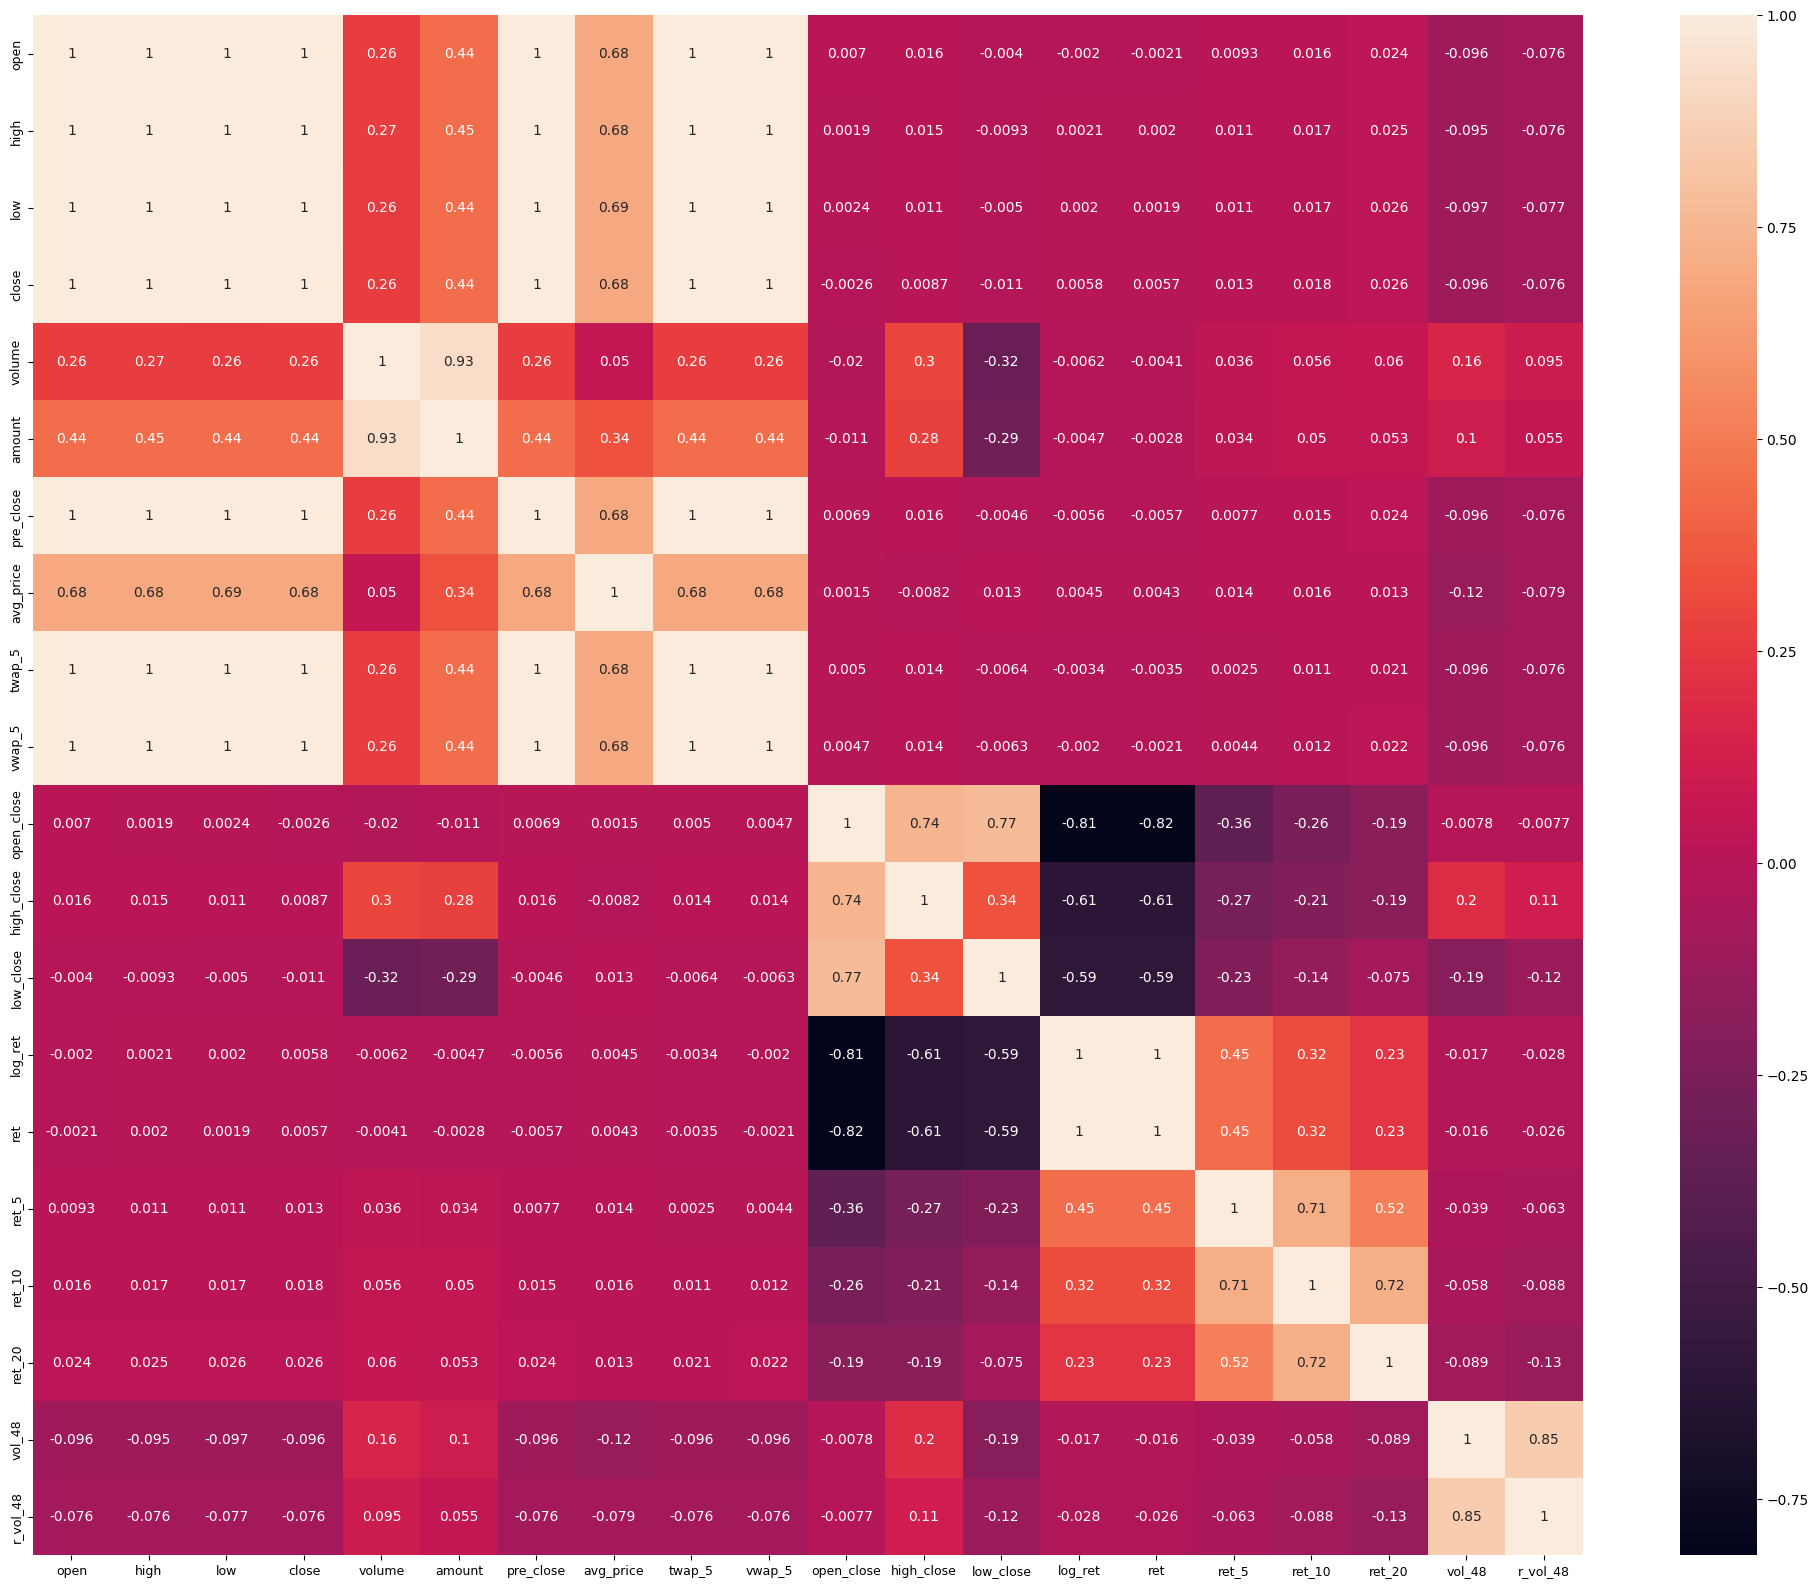

In [12]:
# 查看特征的相关性
plt.figure(figsize=(25,20))
sns.heatmap(df_feature.corr(), annot=True)
# 设置刻度字体大小
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()

In [13]:
df_feature.to_csv('SH000300_feature.csv')

特征工程
- 幅度缩放Scaling
- 标准化Standardization
- 归一化Normalization


https://zhuanlan.zhihu.com/p/38155122

In [14]:
def func(df):
    x = StandardScaler().fit_transform(df.values.reshape(-1,1))
    return x[-1][0]

https://zhuanlan.zhihu.com/p/91100281

In [15]:
# standardization，滚动方法
df_standard = pd.DataFrame()
for column in df_feature.columns:
    df_standard[column] = df_feature[column].rolling(window=100, min_periods=100).apply(func)
df_standard.dropna(axis=0, inplace=True)
df_standard

,open,high,low,close,volume,amount,pre_close,avg_price,twap_5,vwap_5,open_close,high_close,low_close,log_ret,ret,ret_5,ret_10,ret_20,vol_48,r_vol_48
2018-01-05 09:50:00,1.388209,1.798583,1.578604,1.839615,1.404878,1.531941,1.400723,-0.200010,1.090273,1.048916,-1.045732,-0.291535,-0.901410,0.984875,0.984919,1.400277,0.931244,-0.064151,-0.871657,-0.960624
2018-01-05 09:55:00,1.818438,1.941253,1.598874,1.407862,1.418649,1.285888,1.839615,-0.824642,1.257801,1.212499,1.197291,2.103537,0.990786,-1.256898,-1.256694,0.562619,1.098806,-0.255475,-0.760336,-0.916906
2018-01-05 10:00:00,1.390206,1.424357,1.454367,1.570252,0.385246,0.425099,1.407862,-0.151405,1.559733,1.556963,-0.317922,-0.631462,-0.279769,0.281575,0.281168,1.160617,0.784220,-0.309579,-0.797735,-0.922899
2018-01-05 10:05:00,1.557204,1.446401,1.049822,0.855183,0.594228,0.654253,1.570252,-0.152538,1.536967,1.551640,1.745618,2.216583,0.876043,-1.802567,-1.801601,-0.430047,0.354578,-0.419795,-0.459889,-0.627593
2018-01-05 10:10:00,0.808156,0.576864,0.517606,0.516777,0.861366,0.732885,0.855183,-0.739197,1.364618,1.386552,0.705931,0.202829,0.026369,-0.829987,-0.830174,-1.042723,0.005353,-0.324211,-0.371079,-0.560262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-12 14:40:00,-1.851103,-1.920827,-1.841594,-1.923663,-0.082582,-0.160681,-1.864467,-0.505945,-1.905242,-1.907874,0.617742,0.433852,0.878207,-0.542492,-0.542734,-0.321371,-0.250590,-1.082274,1.342117,1.477196
2023-05-12 14:45:00,-1.930279,-2.011796,-1.895610,-1.960341,0.464782,0.149387,-1.923663,-1.390306,-1.897346,-1.918390,0.395671,-0.110807,0.765813,-0.442238,-0.442543,-0.350348,0.168154,-0.743547,1.349830,1.484787
2023-05-12 14:50:00,-1.935715,-1.944685,-1.815887,-1.854508,0.258270,0.094735,-1.960341,-0.787754,-1.895192,-1.910438,-0.301858,-0.566682,0.543394,0.432497,0.432042,-0.432574,-0.132308,-0.663337,1.371113,1.502445
2023-05-12 14:55:00,-1.870045,-1.930343,-1.806657,-1.875514,0.715344,0.390116,-1.854508,-1.239624,-1.915581,-1.915912,0.229704,-0.228761,0.859773,-0.333632,-0.333992,-0.754375,-0.057843,-0.500799,1.352605,1.505005


In [16]:
df_standard.to_csv('SH000300_standard.csv')